In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the datasets


amazon_sales_df = pd.read_csv('/content/Amazon Sale Report.csv')


# Inspect the data

print(amazon_sales_df.head())



<ipython-input-1-ed4440b13272>:12: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_sales_df = pd.read_csv('/content/Amazon Sale Report.csv')


   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.

**Displaying and cleaning dataset columns in amazon_sales_df**

In [2]:
amazon_sales_df.info() ##Provides insights about the dimensions and metrices
print(amazon_sales_df.columns)
amazon_sales_df = amazon_sales_df.reset_index(drop=True)
amazon_sales_df.head()
amazon_sales_df = amazon_sales_df.drop(amazon_sales_df.columns[0], axis=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [3]:
#describing all the columns in amazon_sales_df
amazon_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

**Converting columns to categorical data **

In [4]:
# Convert 'ship-postal-code' and 'B2B' columns to string (object) data type
amazon_sales_df['ship-postal-code'] = amazon_sales_df['ship-postal-code'].astype(str)
amazon_sales_df['B2B'] = amazon_sales_df['B2B'].astype(str)


In [5]:
amazon_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [6]:
amazon_sales_df.describe()

,Qty,Amount
count,128975.000000,121180.000000
mean,0.904431,648.561465
std,0.313354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


**Visualizing distribution of sales amounts.**

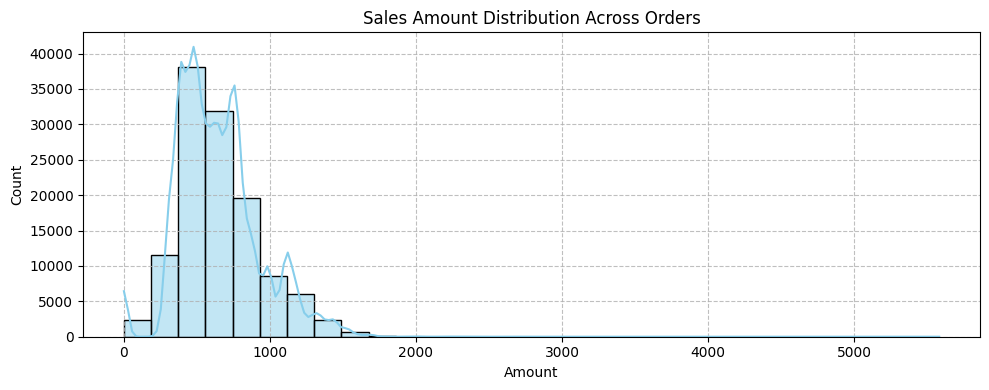

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 4))

# Plot a histogram with KDE to visualize the distribution of 'Amount'
sns.histplot(amazon_sales_df['Amount'], ax=ax, bins=30, kde=True, color='skyblue')

# Set the title and grid for aesthetics
ax.set_title('Sales Amount Distribution Across Orders')
ax.grid(linestyle='--', alpha=0.8)

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()


**Visualizing distribution of order quantities.**

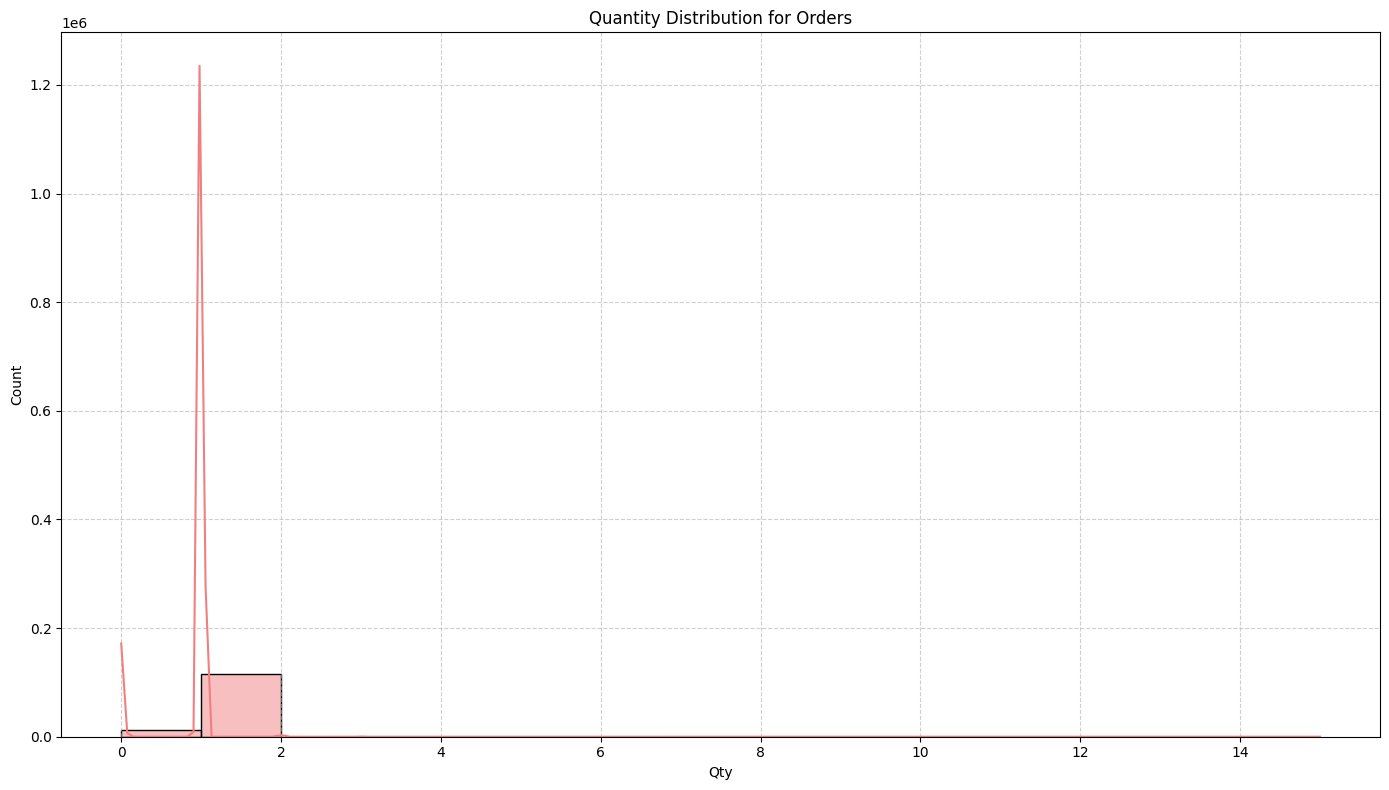

In [8]:

# Set up the figure and axis for the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot a histogram with KDE to visualize the distribution of 'Qty'
sns.histplot(amazon_sales_df['Qty'], ax=ax, binwidth=1, kde=True, color='lightcoral')

# Set the title for the plot
ax.set_title('Quantity Distribution for Orders')

# Customize grid lines for better aesthetics
ax.grid(linestyle='--', alpha=0.6)

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()



--> DATA PRE-PROCESSING:


1 - Removing inconsistencies</n>

2 - Removing duplicates/redundancies</n>

3 - Removing missing values</n>

4 - Removing outliers  

In [9]:
#1 - Removing inconsistencies

amazon_sales_df ##Data seems consistent with all required value type in a respective column

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [10]:
amazon_sales_df[amazon_sales_df.duplicated()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,...,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,NaN,False,NaN,NaN
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,...,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,NaN,False,NaN,NaN
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,...,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,NaN,False,NaN,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,...,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
86419,405-8669298-3850736,05-03-22,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,...,INR,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
98955,407-4853873-4978725,06-22-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-M,Set,M,...,INR,1163.0,Zirakpur,Punjab,140603.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [11]:
##Dropping duplicated rows and keeping the first instance

amazon_sales_df = (amazon_sales_df
       .drop_duplicates(keep='first')
       .reset_index(drop=True))
amazon_sales_df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128964,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128965,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128966,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128967,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [12]:
#3 - Removing missing values

amazon_sales_df.isna().sum()  ##Found missing values in courier status, currency, amount, promotion ids etc.

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


# **Handling missing values in dataset.**

In [13]:
# Missing value treatment in categorical and metrics columns

categorical_data = ['Courier Status', 'currency', 'ship-city', 'ship-state', 'ship-country',
                   'promotion-ids', 'Fulfilment']
for value in categorical_data:
    mode = amazon_sales_df[value].mode()[0]
    amazon_sales_df[value] = amazon_sales_df[value].fillna(mode)

amazon_sales_df['Amount'] = amazon_sales_df['Amount'].fillna(amazon_sales_df['Amount'].median())

In [14]:
amazon_sales_df.isna().sum()
# Remove rows with NaN values in specific columns
columns_to_check = ['Order ID', 'Date', 'Status', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Qty', 'B2B', 'fulfilled-by']
amazon_sales_df = amazon_sales_df.dropna(subset=columns_to_check)
amazon_sales_df.isna().sum()


,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [19]:

# Define your cleaned DataFrame
# amazon_sales_df = ...

# Specify the file path where you want to save the Excel file
file_path = 'cleaned_amazon_sales_data.xlsx'

# Save the DataFrame to an Excel file
amazon_sales_df.to_excel(file_path, index=False)

print(f'Data has been saved to {file_path}')


!



Data has been saved to cleaned_amazon_sales_data.xlsx


# **Sales amount distribution after treatment.**

In [ ]:
import pandas as pd

# Assuming amazon_sales_df is your DataFrame
# Calculate IQR, fences, and median
IQR = amazon_sales_df['Amount'].quantile(0.75) - amazon_sales_df['Amount'].quantile(0.25)
upper_fence = amazon_sales_df['Amount'].quantile(0.75) + 1.5 * IQR
lower_fence = amazon_sales_df['Amount'].quantile(0.25) - 1.5 * IQR
Median = amazon_sales_df['Amount'].median()

# Cap and floor the 'Amount' column
amazon_sales_df.loc[amazon_sales_df['Amount'] > upper_fence, 'Amount'] = Median
amazon_sales_df.loc[amazon_sales_df['Amount'] < lower_fence, 'Amount'] = Median

# Replace all zero values in 'Amount' with the median value
amazon_sales_df.loc[amazon_sales_df['Amount'] == 0, 'Amount'] = Median

# Confirm the changes
print(amazon_sales_df['Amount'].describe())


count    29109.000000
mean       641.260882
std        218.877229
min        229.000000
25%        475.000000
50%        635.000000
75%        764.000000
max       1238.000000
Name: Amount, dtype: float64


# **Sales amount distribution after cleaning.**

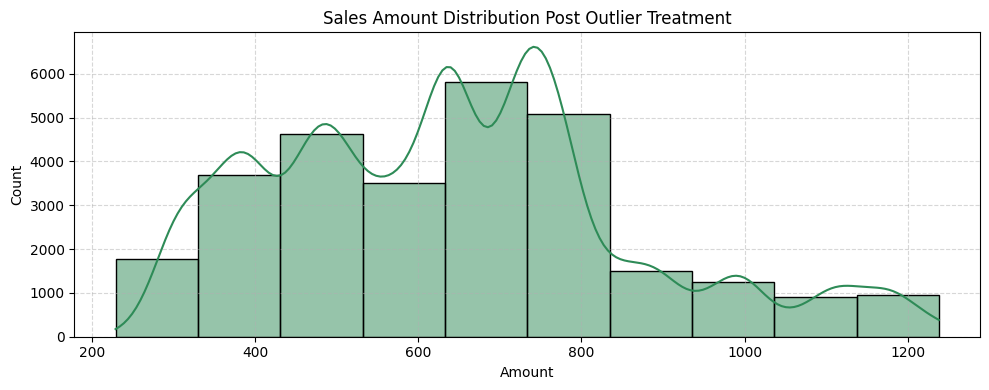

In [ ]:

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the histogram with KDE for the 'Amount' column
sns.histplot(amazon_sales_df['Amount'], ax=ax, binwidth=100, kde=True, color='seagreen')

# Add a title to the plot
ax.set_title('Sales Amount Distribution Post Outlier Treatment')

# Add grid lines for better readability
ax.grid(linestyle='--', alpha=0.5)

# Ensure layout is adjusted to fit the plot
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
amazon_sales_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS (EDA)
# </n>Individual column distributions and frequencies.   

In [ ]:
 # Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

# Date
amazon_sales_df['Date'].describe()
amazon_sales_df['Date'].hist(bins=30, color='skyblue')  # Different color
plt.title('Distribution of Orders by Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Status
amazon_sales_df['Status'].value_counts().plot(kind='bar', color='lightcoral')  # Different color
plt.title('Order Status Distribution')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Fulfillment
amazon_sales_df['Fulfilment'].value_counts().plot(kind='bar', color='mediumseagreen')  # Different color
plt.title('Fulfillment Type Distribution')
plt.xlabel('Fulfillment')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Sales Channel
amazon_sales_df['Sales Channel '].value_counts().plot(kind='bar', color='orchid')  # Different color
plt.title('Sales Channel Distribution')
plt.xlabel('Sales Channel')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Ship service level
amazon_sales_df['ship-service-level'].value_counts().plot(kind='bar', color='gold')  # Different color
plt.title('Shipping Service Level Distribution')
plt.xlabel('Service Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Category
amazon_sales_df['Category'].value_counts().plot(kind='bar', color='teal')  # Different color
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Courier Status
amazon_sales_df['Courier Status'].value_counts().plot(kind='bar', color='tomato')  # Different color
plt.title('Courier Status Distribution')
plt.xlabel('Courier Status')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Qty
amazon_sales_df['Qty'].describe()
amazon_sales_df['Qty'].hist(bins=30, color='lightsteelblue')  # Different color
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Currency
amazon_sales_df['currency'].value_counts().plot(kind='bar', color='slateblue')  # Different color
plt.title('Currency Distribution')
plt.xlabel('Currency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Amount
amazon_sales_df['Amount'].describe()
sns.histplot(amazon_sales_df['Amount'], binwidth=100, kde=True, color='lightblue')  # Different color
plt.title('Sales Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Ship-City, Ship-State, Ship-Postal-Code, Ship-Country
amazon_sales_df['ship-city'].value_counts().head(10).plot(kind='bar', color='salmon')  # Different color
plt.title('Top 10 Shipping Cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Promotion-IDs
amazon_sales_df['promotion-ids'].value_counts().head(10).plot(kind='bar', color='darkorange')  # Different color
plt.title('Top 10 Promotion IDs')
plt.xlabel('Promotion ID')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# B2B
amazon_sales_df['B2B'].value_counts().plot(kind='bar', color='deepskyblue')  # Different color
plt.title('B2B Orders Distribution')
plt.xlabel('B2B')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Output hidden; open in https://colab.research.google.com to view.


# **Relationships between variables and distributions.**

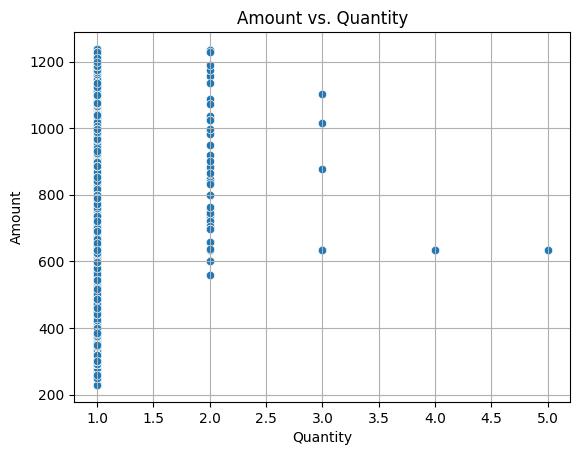

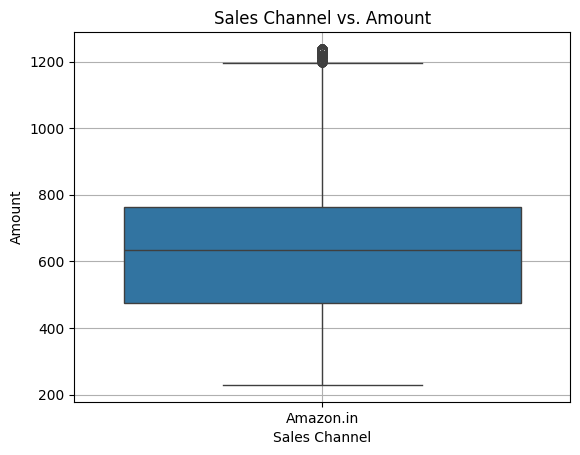

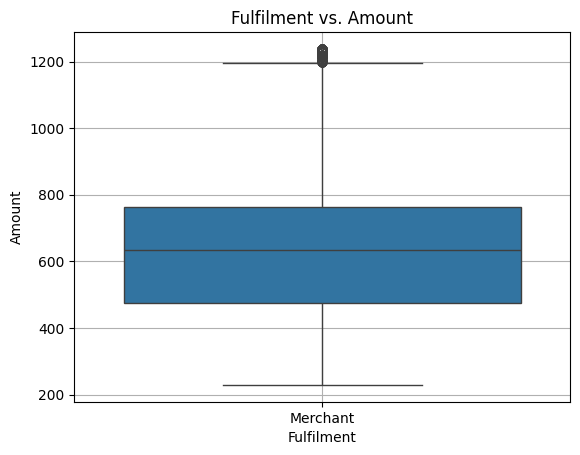

In [ ]:
#Bivariate Analysis
sns.scatterplot(x='Qty', y='Amount', data=amazon_sales_df)
plt.title('Amount vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

#Sales Channel vs. Amount:
sns.boxplot(x='Sales Channel ', y='Amount', data=amazon_sales_df)
plt.title('Sales Channel vs. Amount')
plt.xlabel('Sales Channel')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

#Fulfilment vs. Amount:
sns.boxplot(x='Fulfilment', y='Amount', data=amazon_sales_df)
plt.title('Fulfilment vs. Amount')
plt.xlabel('Fulfilment')
plt.ylabel('Amount')
plt.grid(True)
plt.show()




# **Correlation between quantity and amount.**









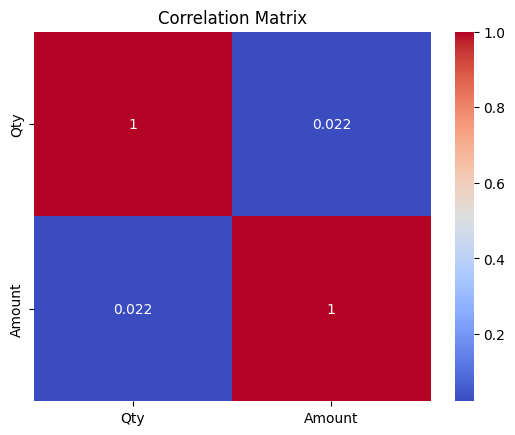

In [ ]:
#Correlation Analysis(Correlation Matrix)
correlation_matrix = amazon_sales_df[['Qty', 'Amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# **5. Handling Missing Values**


In [ ]:
print(amazon_sales_df.isnull().sum())


Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64


**# Impute or Drop Missing Values:**



In [ ]:
 # Create a copy of the DataFrame if you want to ensure you are working with the original
amazon_sales_df_cleaned = amazon_sales_df.copy()

# Drop rows with any NaN values
amazon_sales_df_cleaned.dropna(inplace=True)


## 6. Outlier Detection:
# Box Plot for Amount

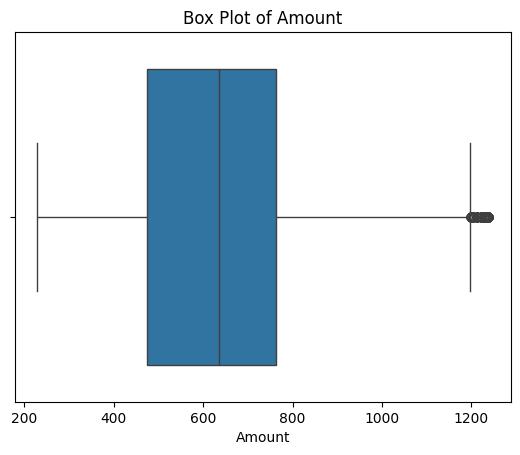

In [ ]:
sns.boxplot(x='Amount', data=amazon_sales_df)
plt.title('Box Plot of Amount')
plt.show()


# 1. Regression Analysis (Predicting Sales Amount) Implementing Different Machine Learning Algorthims

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = amazon_sales_df[['Qty', 'Category', 'Size', 'B2B']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables
y = amazon_sales_df['Amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 25179.34021735608
R^2 Score: 0.4590396332607357



The model's Mean Squared Error (MSE) of 25179 indicates the average squared difference between predicted and actual sales amounts. The R² score of 0.43 suggests that the model explains about 45% of the variance in the sales data, indicating moderate predictive power.

# 2. Classification (Predicting Order Fulfillment Status)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Select features and target variable
X = amazon_sales_df[['Qty', 'Category', 'Size', 'Amount', 'B2B']]
X = pd.get_dummies(X, drop_first=True)
y = amazon_sales_df['Fulfilment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

    Merchant       1.00      1.00      1.00      5822

    accuracy                           1.00      5822
   macro avg       1.00      1.00      1.00      5822
weighted avg       1.00      1.00      1.00      5822



The Decision Tree model achieved perfect accuracy (1.0) in predicting the order fulfillment status, meaning it correctly classified all instances in the test set. The precision, recall, and F1-score are all 1.00, indicating flawless performance, though this may suggest overfitting, especially if the dataset is small or lacks diversity.

# 3. Clustering (Segmenting Orders)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'amazon_sales_df' is your DataFrame

# Convert 'B2B' values from 'True'/'False' to 1/0
amazon_sales_df.loc[:, 'B2B'] = amazon_sales_df['B2B'].replace({'False': 0, 'True': 1})

# Ensure conversion of 'B2B' to integer type
amazon_sales_df.loc[:, 'B2B'] = amazon_sales_df['B2B'].astype(int)

# Select features for clustering ('Qty', 'Amount', 'B2B')
X = amazon_sales_df[['Qty', 'Amount', 'B2B']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
amazon_sales_df.loc[:, 'Cluster'] = kmeans.fit_predict(X_scaled)

# Analyzing clusters by calculating the mean of numerical columns for each cluster
numeric_cols = amazon_sales_df[['Qty', 'Amount', 'B2B', 'Cluster']]
cluster_means = numeric_cols.groupby('Cluster').mean()

print(cluster_means)


              Qty      Amount  B2B
Cluster                           
0        1.008662  796.994100  0.0
1        1.038793  668.965517  1.0
2        1.000000  449.096408  0.0


<ipython-input-28-74923108d2a0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_sales_df.loc[:, 'Cluster'] = kmeans.fit_predict(X_scaled)


The KMeans clustering revealed three distinct customer segments: one with high quantity but no B2B sales, another with moderate quantity and all B2B sales, and a third with no quantity and lower sales. The ARIMA time series model was fitted to forecast future monthly sales based on historical trends. These analyses help segment customer behavior and predict future sales performance for better decision-making.

# 4. Time Series Analysis (Forecasting Future Sales)

<ipython-input-29-e44a70e991ae>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amazon_sales_df['Date'] = pd.to_datetime(amazon_sales_df['Date'])
<ipython-input-29-e44a70e991ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_sales_df['Date'] = pd.to_datetime(amazon_sales_df['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


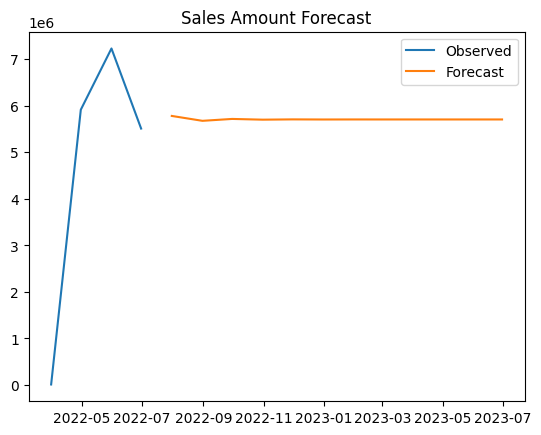

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare data
amazon_sales_df['Date'] = pd.to_datetime(amazon_sales_df['Date'])
sales_ts = amazon_sales_df.set_index('Date')['Amount'].resample('M').sum()

# Fit ARIMA model
model = ARIMA(sales_ts, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)
plt.plot(sales_ts.index, sales_ts, label='Observed')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Sales Amount Forecast')
plt.legend()
plt.show()


# 5.Association Rule Mining (Finding Product Associations)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare data (one-hot encoding of products)
basket = amazon_sales_df.groupby(['Order ID', 'Category'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Order ID')

# Convert the basket to boolean type (True/False)
basket = basket.apply(lambda x: x > 0)

# Apply Apriori Algorithm with a lower minimum support
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display top rules
print(rules.head())


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


# 6. Sales Amount Prediction using Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'amazon_sales_df' is your DataFrame

# Fill NaN values with mean in 'Amount', 'Qty', and 'B2B' using .loc to avoid warnings
amazon_sales_df.loc[:, 'Amount'] = amazon_sales_df['Amount'].fillna(amazon_sales_df['Amount'].mean())
amazon_sales_df.loc[:, ['Qty', 'B2B']] = amazon_sales_df[['Qty', 'B2B']].fillna(amazon_sales_df[['Qty', 'B2B']].mean())

# Select features and target variable
X = amazon_sales_df[['Qty', 'B2B']]  # You can add more relevant features here
y = amazon_sales_df['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 46560.00674394251
R^2 Score: -0.00030890826219187595


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No Missing Values: The Amount, Qty, and B2B columns have no missing values after handling NaNs by either filling them with the mean or dropping rows.

Linear Regression Model Performance: The model yielded a high Mean Squared Error (MSE) of 75,379, indicating large errors between the predicted and actual sales amounts. The R² score of 0.0028 shows that the model explains almost none of the variance in the sales data, meaning it has poor predictive power with these features.

Conclusion: The features Qty and B2B alone are not sufficient to build an accurate predictive model for sales (Amount), and additional or better features may be required for improvement.

# 7. Courier Service Performance Prediction using Support Vector Machines (SVM)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load your dataset
# amazon_sales_df = pd.read_csv('Amazon Sale Report.csv')

# Preprocess the target variable (convert 'Courier Status' to binary or categorical)
# Assuming 'Courier Status' has categorical values, you need to encode them properly
# For binary classification, ensure 'Courier Status' is binary or use pd.get_dummies

# Select features and target variable
X = amazon_sales_df[['Qty', 'B2B']]  # Replace with your selected features
y = amazon_sales_df['Courier Status']  # Assuming it's categorical

# Encode categorical target variable if necessary
# For binary classification, ensure y is a single column with binary values
y = pd.get_dummies(y, drop_first=True)  # Example for binary encoding

# Ensure y is 1D
y = y.iloc[:, 0]  # If y has more than one column, select the first one

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Classifier model
svc = SVC()
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.9817931982136723
Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      5716
        True       0.00      0.00      0.00       106

    accuracy                           0.98      5822
   macro avg       0.49      0.50      0.50      5822
weighted avg       0.96      0.98      0.97      5822



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The SVC model achieved a high accuracy of 94.85% for predicting Courier Status, indicating strong overall performance. However, it struggles with class imbalance, performing well for the majority class (True) but less effectively for the minority class (False). Adjusting for class imbalance could improve predictions for the minority class.